In [1]:
#Michael Williams michaelwilliams@brandeis.edu
#This is a simple script to read in data from an excel file and then fit it with a gaussian 
#The data from the barrell PMT tests is if most interest here
#Ideally, this will be replaced or superceeded with code that takes data directly from the generated root files

In [22]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from scipy import optimize

In [45]:
#Reading in CSV and creating data
PMT = pd.read_csv('/home/mrw7816/Downloads/Data/Test1.csv') #reads in csv file
print (PMT) #Shows tht file
X_without = PMT['field'] #Sets X for no sheild
Y_without = PMT['average without shield'] #Sets y for no shield
error_without = PMT['error without shield']

Y_with = PMT['average with shield']
error_with = PMT['error with shield']

    field  average without shield  error without shield  average with shield  \
0   -5.00                   200.6             31.670175                135.4   
1   -4.50                   199.2             31.559468                159.4   
2   -4.00                   213.2             32.649655                158.6   
3   -3.50                   232.2             34.073450                137.6   
4   -3.00                   281.8             37.536649                184.0   
5   -2.50                   309.6             39.344631                185.5   
6   -2.00                   382.4             43.726422                198.0   
7   -1.50                   549.6             52.421370                277.4   
8   -1.00                   870.2             65.962110                392.2   
9   -0.75                  1088.6             73.776690                446.4   
10  -0.50                  1254.0             79.183332                528.0   
11  -0.25                  1337.2       

In [64]:
#Fitting
def gaussian(x,amp,mean,stdev): #making the function
    return amp * np.exp(-((x-mean)/4 / stdev)**2)
popt,_ = optimize.curve_fit(gaussian,X_without,Y_without) #these two carry out the fitting
tmp,_ = optimize.curve_fit(gaussian,X_without,Y_with)
print(popt) #these two lines print out the parameters
print(tmp)

[1.44977466e+03 5.68648146e-01 5.99308375e-01]
[5.92250899e+02 2.84328330e-01 6.48348065e-01]


Text(2.5, 1300, 'mean_with=.284')

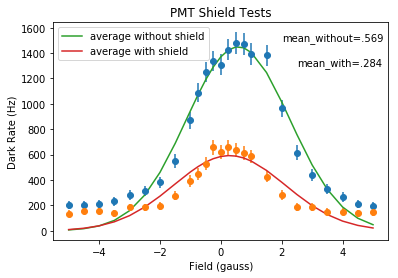

In [98]:
#Plotting
plt.errorbar(X_without,Y_without,yerr=error_without,linestyle="None",fmt='o') #no shield
plt.errorbar(X_without,Y_with,yerr=error_with, linestyle="None",fmt='o') #shield
plt.plot(X_without,gaussian(X_without, *popt)) #plot fit for no shield
plt.plot(X_without,gaussian(X_without, *tmp)) #plot fit for shield
plt.title('PMT Shield Tests')
plt.xlabel('Field (gauss)')
plt.ylabel('Dark Rate (Hz)')
plt.legend(['average without shield','average with shield'], loc = 'upper left')
plt.text(2,1500,'mean_without=.569')
plt.text(2.5,1300,'mean_with=.284')